## Gather Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Covid-19 Dataset for Saudi Arabia taken from 
# King Abdullah Petroleum Studies and Research Center (KAPSARC) Website
df = pd.read_csv('saudi-arabia-coronavirus-disease-covid-19-situation.csv', sep=';')

#### First, investigate the dataset. We can see that the dataset is not ordered, and some columns need to be converted to more appropriate datatypes.

In [3]:
df.shape

(77987, 7)

In [4]:
df.dtypes

Daily / Cumulative     object
Indicator              object
Date                   object
Event                  object
region                 object
City                   object
Cases                 float64
dtype: object

In [5]:
df.head(10)

,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
0,Cumulative,Recoveries,2020-05-20,NaN,Northern Borders,Al Judayyidah,2.0
1,Cumulative,Recoveries,2020-05-20,NaN,Mecca,Umm Aldoom,1.0
2,Cumulative,Recoveries,2020-05-20,NaN,Eastern Region,Nairyah,38.0
3,Cumulative,Recoveries,2020-05-20,NaN,Medina,Mahd Al Dhahab,3.0
4,Cumulative,Recoveries,2020-05-20,NaN,Riyadh,Howtat Bani Tamim,7.0
5,Cumulative,Recoveries,2020-05-20,NaN,Asir,Khamis Mushait,92.0
6,Cumulative,Recoveries,2020-05-20,NaN,Al Jouf,Al Hadithah Border Station,17.0
7,Cumulative,Recoveries,2020-05-20,NaN,Asir,Bisha,69.0
8,Cumulative,Recoveries,2020-05-20,NaN,Eastern Region,Bqeeq,29.0
9,Cumulative,Recoveries,2020-05-20,NaN,Jazan,Jazan,59.0


In [6]:
df.tail(10)

,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
77977,Cumulative,Critical cases,2020-06-19,NaN,Total,Total,1955.0
77978,Cumulative,Critical cases,2020-06-25,NaN,Total,Total,2273.0
77979,Cumulative,Critical cases,2020-06-28,NaN,Total,Total,2285.0
77980,Cumulative,Critical cases,2020-07-07,NaN,Total,Total,2263.0
77981,Cumulative,Critical cases,2020-07-10,NaN,Total,Total,2230.0
77982,Cumulative,Critical cases,2020-07-11,NaN,Total,Total,2223.0
77983,Cumulative,Critical cases,2020-07-12,NaN,Total,Total,2235.0
77984,Cumulative,Critical cases,2020-07-13,NaN,Total,Total,2230.0
77985,Cumulative,Critical cases,2020-07-28,NaN,Total,Total,2063.0
77986,Cumulative,Critical cases,2020-08-05,NaN,Total,Total,1992.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77987 entries, 0 to 77986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Daily / Cumulative  77987 non-null  object 
 1   Indicator           77987 non-null  object 
 2   Date                77987 non-null  object 
 3   Event               281 non-null    object 
 4   region              77981 non-null  object 
 5   City                77981 non-null  object 
 6   Cases               77981 non-null  float64
dtypes: float64(1), object(6)
memory usage: 4.2+ MB


#### We can also find how many categorical variables are in our categorical columns using the value_counts() pandas function.

In [8]:
df.Indicator.value_counts()

Cases             29804
Recoveries        24510
Active cases      18367
Mortalities        5188
Critical cases      118
Name: Indicator, dtype: int64

In [9]:
df.Event.value_counts()

Curfew lifted (all regions)                                                       117
Partial lifting of curfew in all cities except Makkah                              28
Jeddah areas lockdown - 24 h curfew                                                19
Makkah lockdown                                                                    18
Riyadh, Dammam , Tabuk , Dahran, Hafuf, Jeddah, Taif, Qatif , Khobar24h curfew     18
Makkah , Madinah 24 hours curfew                                                   15
Jeddah lockdown                                                                    15
Riyadh, Makkah and Madinah lockdown - curfew (6am - 3pm)                           13
Curfew started for 21 days (6am -7 pm)                                             10
Domestic flights suspension                                                         8
Gov / private suspension                                                            7
International flights suspension for 14 days          

In [10]:
df.City.value_counts()

Total        1137
Jeddah        951
Mecca         946
Riyadh        936
Dammam        885
             ... 
Samira         83
Suwayr         73
Al Gatt        59
Al Hajrah      36
Abu Raka       11
Name: City, Length: 205, dtype: int64

In [11]:
df.region.value_counts()

Riyadh              12480
Eastern Region      12090
Mecca               11200
Asir                 9522
Jazan                6571
Qassim               5910
Medina               3633
Tabuk                3326
Al Bahah             3113
Hail                 2439
Najran               2365
Northern Borders     2320
Al Jouf              1875
Total                1137
Name: region, dtype: int64

#### Find out any null values in any of the columns.

In [12]:
df[df.region.isnull()]

,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
5493,Cumulative,Critical cases,2020-05-27,NaN,NaN,NaN,NaN
5494,Cumulative,Critical cases,2020-05-31,NaN,NaN,NaN,NaN
31112,Cumulative,Critical cases,2020-05-29,NaN,NaN,NaN,NaN
46802,Cumulative,Critical cases,2020-05-28,NaN,NaN,NaN,NaN
60505,Cumulative,Critical cases,2020-05-26,NaN,NaN,NaN,NaN
60506,Cumulative,Critical cases,2020-05-30,NaN,NaN,NaN,NaN


In [13]:
df[df.City.isnull()]

,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
5493,Cumulative,Critical cases,2020-05-27,NaN,NaN,NaN,NaN
5494,Cumulative,Critical cases,2020-05-31,NaN,NaN,NaN,NaN
31112,Cumulative,Critical cases,2020-05-29,NaN,NaN,NaN,NaN
46802,Cumulative,Critical cases,2020-05-28,NaN,NaN,NaN,NaN
60505,Cumulative,Critical cases,2020-05-26,NaN,NaN,NaN,NaN
60506,Cumulative,Critical cases,2020-05-30,NaN,NaN,NaN,NaN


In [14]:
df[df.Cases.isnull()]

,Daily / Cumulative,Indicator,Date,Event,region,City,Cases
5493,Cumulative,Critical cases,2020-05-27,NaN,NaN,NaN,NaN
5494,Cumulative,Critical cases,2020-05-31,NaN,NaN,NaN,NaN
31112,Cumulative,Critical cases,2020-05-29,NaN,NaN,NaN,NaN
46802,Cumulative,Critical cases,2020-05-28,NaN,NaN,NaN,NaN
60505,Cumulative,Critical cases,2020-05-26,NaN,NaN,NaN,NaN
60506,Cumulative,Critical cases,2020-05-30,NaN,NaN,NaN,NaN


#### The null values seem to be critical cases in the 6 dates shown above, I'm going to remove them since I don't have any information on what region or city they're in. 

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
77982    False
77983    False
77984    False
77985    False
77986    False
Length: 77987, dtype: bool

#### There seems to be no duplicates in the dataset.

## Clean Dataset

1. Replace NaN's in Event column with 'No Event'.
2. Convert Date column to datetime object.
3. Drop null columns in [Region, City, Cases].
4. Convert Cases column to int datatype.
5. Rename 'Daily / Cumulative' to Daily_Cumulative
6. Rename region column to Region.
7. Sort data by Date (ascending).

In [16]:
# Make copy of dataframe.
df_clean = df.copy()

In [17]:
# 1. Replace NaN's in Event column with 'No Event'.
df_clean.Event.fillna('No Event', inplace=True)

In [18]:
# 2. Convert Date column to datetime object.
pd.to_datetime(df_clean.Date)

0       2020-05-20
1       2020-05-20
2       2020-05-20
3       2020-05-20
4       2020-05-20
           ...    
77982   2020-07-11
77983   2020-07-12
77984   2020-07-13
77985   2020-07-28
77986   2020-08-05
Name: Date, Length: 77987, dtype: datetime64[ns]

In [19]:
# 3. Drop null columns in [Region, City, Cases].
df_clean = df_clean.dropna(subset=['Cases'])

In [20]:
# 4. Convert Cases column to int datatype.
df_clean.Cases = df_clean.Cases.astype(int)

In [21]:
# 5. Rename 'Daily / Cumulative' to Daily_Cumulative
df_clean.rename(columns={'Daily / Cumulative': 'Daily_Cumulative'}, inplace=True)

In [22]:
# 6. Rename region column to Region.
df_clean.rename(columns={'region': 'Region'}, inplace=True)

In [23]:
# 7. Sort data by Date (ascending).
df_clean.sort_values(by=['Date'], inplace=True, ascending=True)

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77981 entries, 33175 to 77986
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Daily_Cumulative  77981 non-null  object
 1   Indicator         77981 non-null  object
 2   Date              77981 non-null  object
 3   Event             77981 non-null  object
 4   Region            77981 non-null  object
 5   City              77981 non-null  object
 6   Cases             77981 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 4.8+ MB


In [25]:
df_clean

,Daily_Cumulative,Indicator,Date,Event,Region,City,Cases
33175,Cumulative,Active cases,2020-03-02,No Event,Eastern Region,Qatif,1
43256,Daily,Cases,2020-03-02,First case of COVID-19,Eastern Region,Qatif,1
52843,Cumulative,Active cases,2020-03-02,No Event,Total,Total,1
5506,Daily,Cases,2020-03-02,First case of COVID-19,Total,Total,1
34866,Cumulative,Cases,2020-03-02,No Event,Total,Total,1
...,...,...,...,...,...,...,...
62010,Cumulative,Cases,2020-08-05,No Event,Najran,Yadamah,192
62009,Cumulative,Cases,2020-08-05,No Event,Qassim,Al Bukayriyah,417
62008,Cumulative,Cases,2020-08-05,No Event,Northern Borders,Al Judayyidah,57
62019,Cumulative,Cases,2020-08-05,No Event,Hail,Bagaa,268


## Exploratory Analysis

### Univariate Exploration

To start off the exploratory analysis, I made two count plots of the Region and Indicator columns. This just shows how much of each of these categorical column have of each value. Since the number of cases differs for each row, it's not an accurate indication of any insights on the dataset. 

- The Region count plot shows us that there's 13 Saudi regions, in addition to the Total column which makes 14 values. The 3 regions with the highest values in the dataset are Riyadh, Eastern Region and Mecca. 

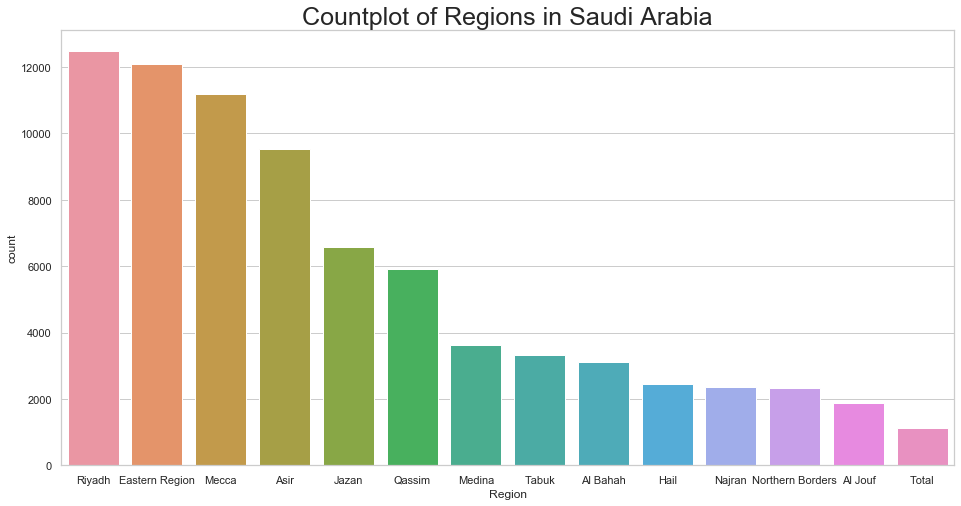

In [37]:
fig, ax = plt.subplots(nrows=1, figsize = [16,8])
sns.set(style='whitegrid')
sns.countplot(data = df_clean, x = 'Region', order = df_clean['Region'].value_counts().index).set_title('Countplot of Regions in Saudi Arabia', fontsize = 25)
plt.show()

- The Indicator count plot shows us that there's 5 indicators, Starting with Cases, Recoveries, Active cases, Mortalities and lastly Critical cases. This seems to be a good indication of Recovery rate being high, and Critical cases being relatively low in the country.

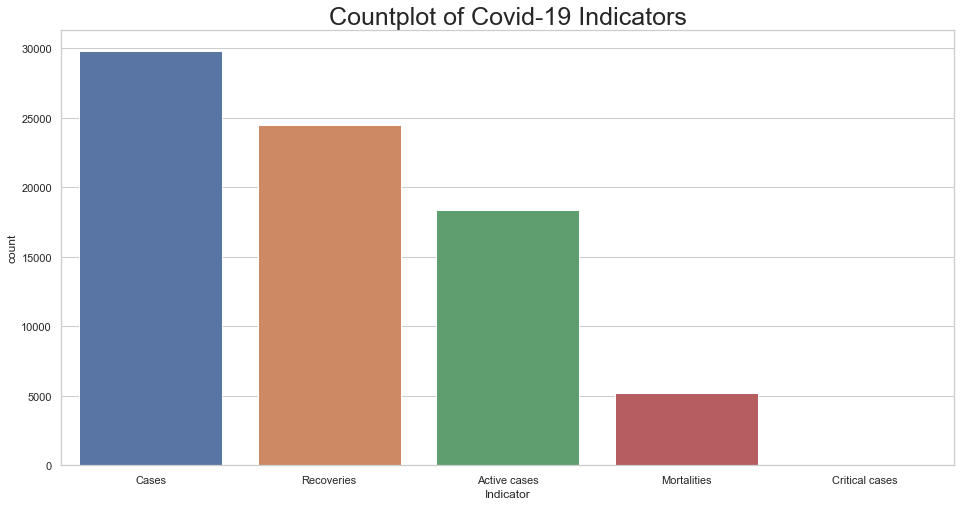

In [38]:
fig, ax = plt.subplots(nrows=1, figsize = [16,8])
sns.set(style='whitegrid')
sns.countplot(data = df_clean, x = 'Indicator', order = df_clean['Indicator'].value_counts().index).set_title('Countplot of Covid-19 Indicators', fontsize=25)

plt.show()

### Bivariate Exploration

For the bivariate exploration, I made graphs of the total cases and active cases up to the latest date available in the dataset which is the 5th of August.

- This graph only shows the cities in the Mecca region, as of the 5th of August, Jeddah has the most Active cases of Covid-19, with 3675 cases. Mecca is second and has 1584 cases, Taif has 872. You can also zoom in the graph to see that Hadda with the least active cases only has 1 case.

In [ ]:
data = df_clean[df_clean.Region != "Total"]
data = data[data.Region == "Mecca"]
data = data[data.Indicator == "Active cases"]
data = data[data.Date == "2020-08-05"]
fig = px.bar(data, x="City", y="Cases", title="Total Active Cases in Makkah Region - 5th August 2020", template="plotly_white")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- This graph shows the cumulative number of cases of Covid-19 up until the latest date in the dataset, which is the 5th of August. Similiar to our univariate count plot, the regions in the top 3 spots are Mecca, Eastern Region and Riyadh, although their order differs. Mecca and Eastern Region alone take up half the pie graph, meaning that half the cases in the country up until the 5th of August are in those 2 regions.

In [ ]:
data = df_clean.query("Daily_Cumulative=='Cumulative'")
data = data.query("Indicator=='Cases'")
data = data[data.Date == "2020-08-05"]
data = data[data.Region != "Total"]
fig = px.pie(data, values='Cases', names='Region', title='Total Cases by Region - 5th August 2020')
fig.show()

### Multivariate Exploration

I used the Indicator column on various graphs for my multivariate exploration. The Indicator column has 5 values.
1. Active cases
2. Cases
3. Recoveries
4. Mortalities
5. Critical cases

- The following Graph shows the total number of cases for each indicator, from the start of the first case of Covid-19 in the 2nd of March 2020, up until the latest date in the dataset which is the 5th of August. Recovery rates have been higher than the active cases since the 17th of May 2020. We can also see that Mortalities and Critical cases have been relatively low, which is the same as the count plots in the univariate exploration. 

In [ ]:
data = df_clean.query("City=='Total'")
data = data.query("Daily_Cumulative=='Cumulative'")
fig = px.line(data, x="Date", y="Cases", title='Total Cases in Saudi Arabia ', color='Indicator', template="plotly_white")
fig.show()

- In the dataset, there was an Event column indicating if any event happened like for example the start or end of curfew for some regions or cities. I plotted this with the number of daily cases to see if any event had an impact in the number of daily cases. I noticed a spike in cases after the partial lifting of curfew in all cities except Makkah and after curfew lifted in all regions. The cases have been gradually decreasing since the 7th of July.

In [ ]:
data = df_clean.query("City=='Total'")
data = data.query("Indicator=='Cases'")
data = data.query("Daily_Cumulative=='Daily'")
fig = px.line(data, x="Date", y="Cases", title='Daily Cases in Saudi Arabia with Major Events', template="plotly_white")
event = data.query("Event!='No Event'")
x_val = event.Date
y_val = event.Cases

hover_text= (event.Event).to_numpy()
fig.add_trace(go.Scatter(x=x_val, y=y_val,
                    mode='markers',
                    name='Event',
                    hovertext = hover_text,
                    hoverinfo="text",
                    showlegend=True))
fig.show()

- In the following bubble chart are July 2020's cases of Covid-19. The size of the bubble is determined by the number of total cases in each of the 3 indicators which are Cases, Recoveries and Mortalities. The Active cases indicator seems to not be present in July, the Cases indicator seems to have replaced it. The highest recovery count for one day was on the 13th of July 2020 with 7718 recoveries made in one day.

In [ ]:
data = df_clean.query("City=='Total'")
data = data.query("Daily_Cumulative=='Daily'")
fig = px.scatter(data, x="Date", y="Cases", size="Cases", size_max=30, title='Daily Cases in Saudi Arabia in July 2020', color='Indicator', template="plotly_white", range_x=['2020-07-01','2020-07-31'])
fig.show()